In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score

from sklearn.model_selection import StratifiedKFold, cross_val_score

from sklearn.model_selection import GridSearchCV

In [13]:
df = pd.read_csv("Churn_Modelling.csv")

In [14]:
df.shape

(10000, 14)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [16]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [17]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [18]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# EDA

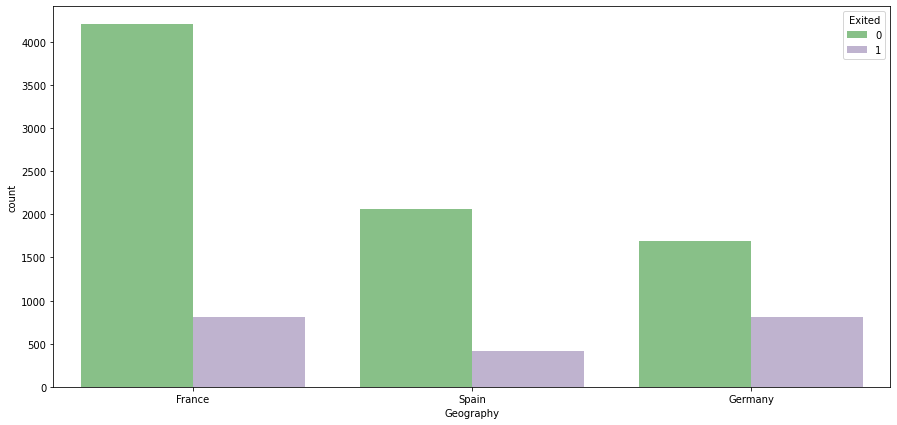

In [19]:
plt.subplots(figsize=(15,7))
sns.countplot(x='Geography', hue = 'Exited',data = df,palette='Accent')

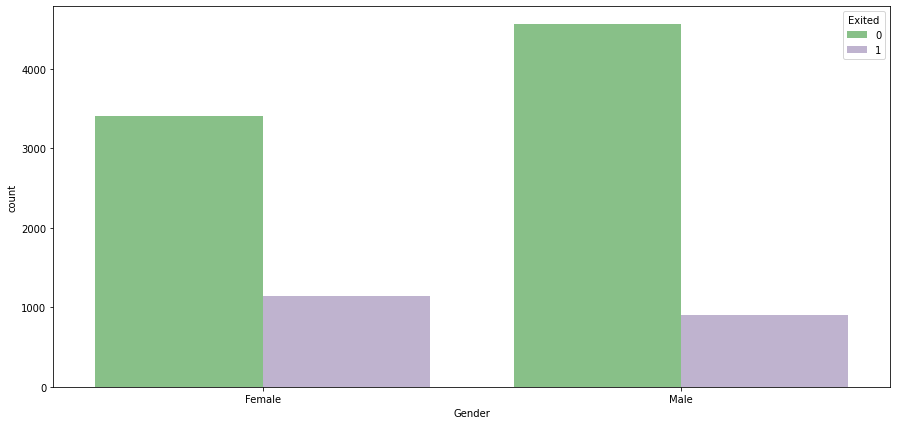

In [20]:
plt.subplots(figsize=(15,7))
sns.countplot(x=df['Gender'],hue='Exited',data=df,palette='Accent')

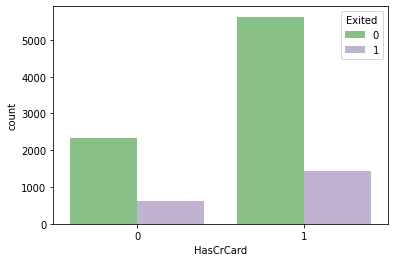

In [21]:
sns.countplot(x='HasCrCard', hue = 'Exited',data = df,palette='Accent')

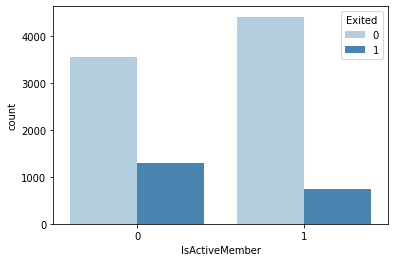

In [22]:
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df,palette='Blues')

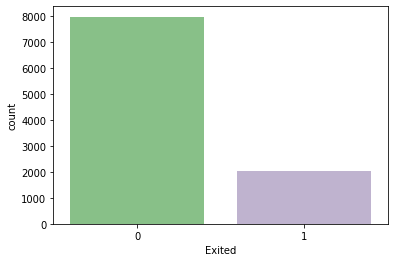

In [23]:
sns.countplot(df['Exited'],palette='Accent')

In [24]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

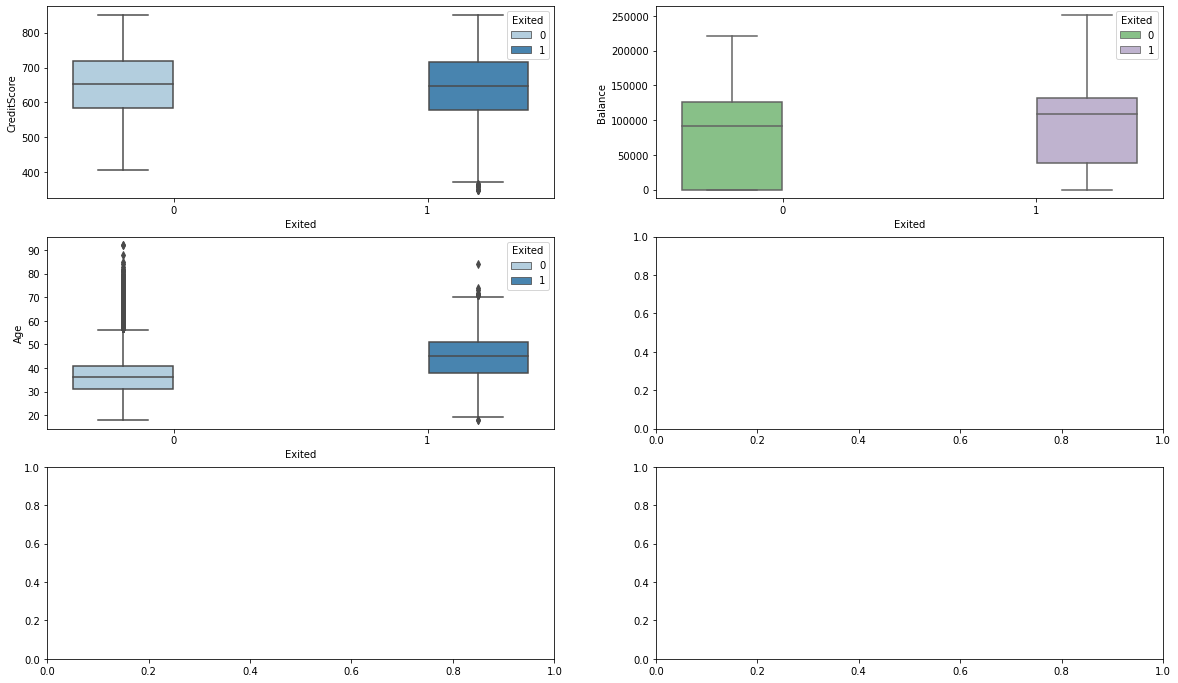

In [25]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(x = 'Exited',y='CreditScore', hue = 'Exited',data = df, ax=axarr[0][0],palette='Blues')
sns.boxplot(x = 'Exited',y='Balance', hue = 'Exited',data = df, ax=axarr[0][1],palette='Accent')
sns.boxplot(x = 'Exited',y='Age', hue = 'Exited',data = df , ax=axarr[1][0],palette='Blues')

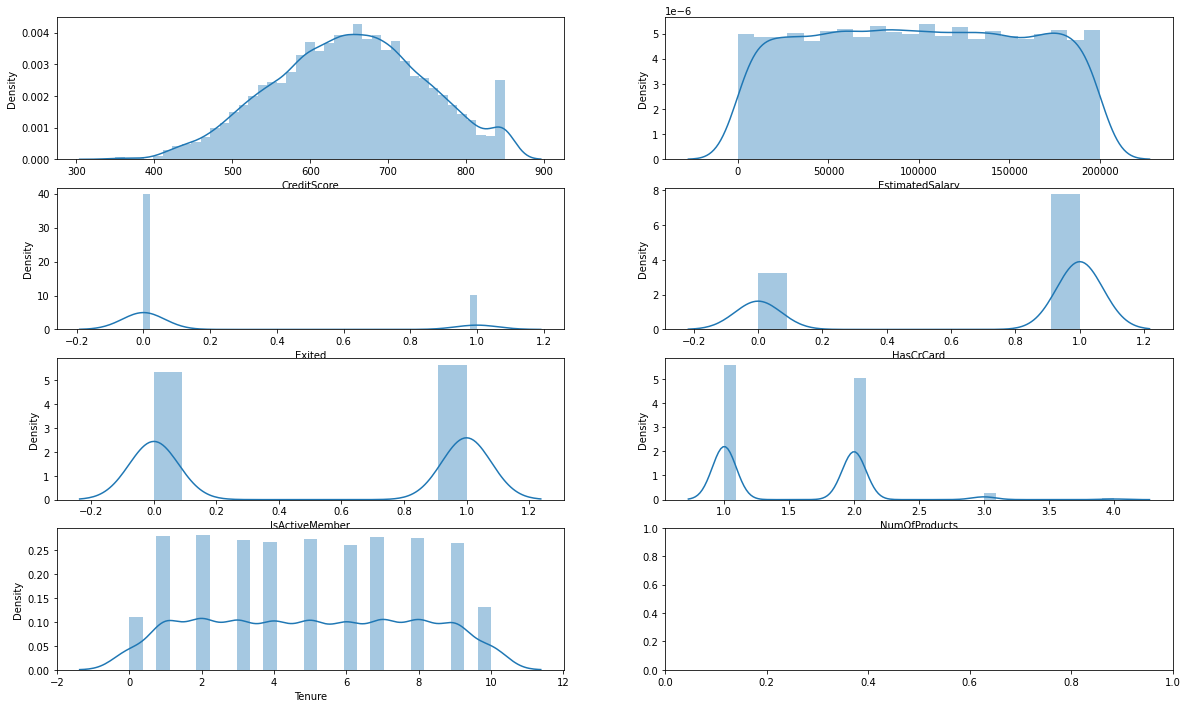

In [26]:
fig, axarr = plt.subplots(4, 2, figsize=(20, 12))
sns.distplot(df['CreditScore'], ax=axarr[0][0])
sns.distplot(df['EstimatedSalary'],ax=axarr[0][1])
sns.distplot(df['Exited'], ax=axarr[1][0])
sns.distplot(df['HasCrCard'], ax=axarr[1][1])
sns.distplot(df['IsActiveMember'], ax=axarr[2][0])
sns.distplot(df['NumOfProducts'], ax=axarr[2][1])
sns.distplot(df['Tenure'], ax=axarr[3][0])

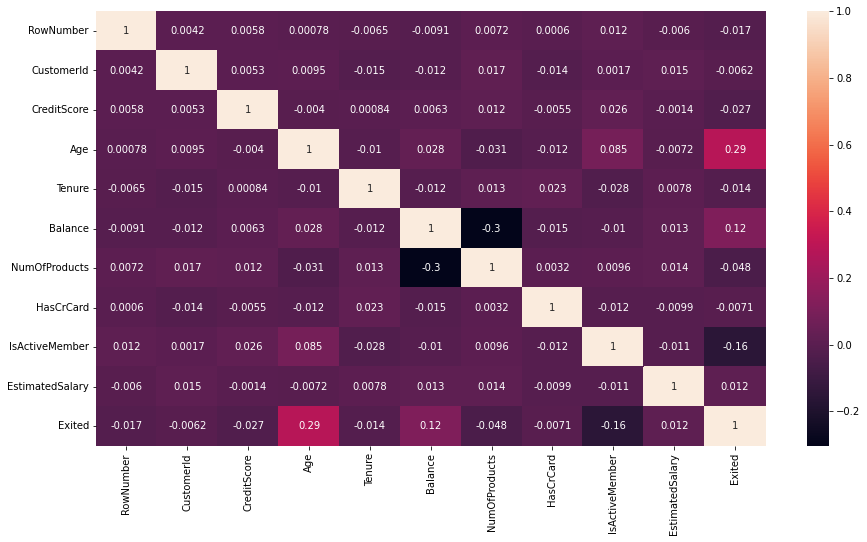

In [27]:
cr = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(cr,annot=True)

Data Preprocessing

In [28]:
l = preprocessing.LabelEncoder()

In [29]:
df['Gender']= l.fit_transform(df['Gender'])

**Feature engineering**

In [30]:
X = df.drop(["RowNumber", "CustomerId", "Surname","Exited"], axis = 1)

In [31]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10


In [32]:
X=pd.get_dummies(X,columns=['Geography'])

In [33]:
Y=df["Exited"]

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [35]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((7000, 12), (3000, 12), (7000,), (3000,))

In [36]:
sc = StandardScaler()
sm = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Model Selection**

In [37]:
clf = [LogisticRegression(),DecisionTreeClassifier(criterion='gini'),RandomForestClassifier(),KNeighborsClassifier(),SVC()]
names = ["Logistic Regression","Decision Tree Classifier","RandomForestClassifier","KNeighborsClassifier","SVC"]

In [38]:
allacc = []
for i in clf:
  i.fit(X_train,Y_train)
  clfpred=i.predict(X_test)
  allacc.append(round(accuracy_score(Y_test,clfpred),4)*100)

In [39]:
clfdf=pd.DataFrame({
        "Classifier":names,
        "Accuracy":allacc
    })

In [40]:
clfdf
# Accuracy without hyperparameter tuning

,Classifier,Accuracy
0,Logistic Regression,81.13
1,Decision Tree Classifier,80.80
2,RandomForestClassifier,87.03
3,KNeighborsClassifier,83.33
4,SVC,86.27


Parameter Tuning

Tuning Logistic Model

In [41]:
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(0.001, 0.01, 1, 5, 10)
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=5)
Grid_LR.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (0.001, 0.01, 1, 5, 10), 'penalty': ('l1', 'l2')})

In [42]:
print("Best Score: ",Grid_LR.best_score_)
print("Best Parameters:")
Grid_LR.best_params_

Best Score:  0.8088571428571429
Best Parameters:


{'C': 1, 'penalty': 'l2'}

In [43]:
Best_LR_Model = Grid_LR.best_estimator_

Tuning Decision Tree

In [44]:
parameters = {
            "criterion":['gini', 'entropy'],
            "max_depth":range(1,10),
            "min_samples_split":range(1,10),
            "min_samples_leaf":range(1,5)
            }
decisiontree = DecisionTreeClassifier()
Grid_DTC = GridSearchCV(decisiontree, parameters, verbose=1, cv= 10, n_jobs=-1)
Grid_DTC.fit(X_train, Y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [45]:
print("Best Score: ",Grid_DTC.best_score_)
print("Best Parameters:")
Grid_DTC.best_params_

Best Score:  0.8544285714285715
Best Parameters:


{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 4,
 'min_samples_split': 9}

In [46]:
Best_DTC_Model = Grid_DTC.best_estimator_

Tuning KNN Model

In [47]:
parameters = {
    'n_neighbors':[1,3,5,7,9,12,15,20]
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 12, 15, 20]})

In [48]:
print("Best Score: ",Grid_KNN.best_score_)
print("Best Parameters:")
Grid_KNN.best_params_

Best Score:  0.8302857142857143
Best Parameters:


{'n_neighbors': 15}

In [49]:
Best_KNN_Model = Grid_KNN.best_estimator_

Tuning Random Forest Classifier

In [50]:
parameters = {
    'n_estimators' : [40,60,80,100,120,150]
}
Grid_RFC = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RFC.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [40, 60, 80, 100, 120, 150]})

In [51]:
print("Best Score: ",Grid_RFC.best_score_)
print("Best Parameters:")
Grid_RFC.best_params_

Best Score:  0.8607142857142858
Best Parameters:


{'n_estimators': 120}

In [52]:
Best_RFC_Model = Grid_RFC.best_estimator_

Tuning Support Vector Classifier

In [53]:
parameters = {
    'C' : [0.001,0.01, 1, 3 ,5],
    'kernel':['rbf','poly'],
    'degree': [2,3,4],
    "probability":[True]
}
Grid_SVC = GridSearchCV(SVC(),parameters, cv=5)
Grid_SVC.fit(X_train, Y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 1, 3, 5], 'degree': [2, 3, 4],
                         'kernel': ['rbf', 'poly'], 'probability': [True]})

In [54]:
print("Best Score: ",Grid_SVC.best_score_)
print("Best Parameters:")
Grid_SVC.best_params_

Best Score:  0.8525714285714286
Best Parameters:


{'C': 5, 'degree': 2, 'kernel': 'rbf', 'probability': True}

In [55]:
Best_SVC_Model = Grid_SVC.best_estimator_

Evaluating all the models using Cross Validation

In [56]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, classification_report
Model_Names = ['Logistic Regression','Decision Tree','KNN','Random Forest','Support Vector Classifier']
confusion_matrices =[]
matrices = [ confusion_matrix(Y_test,Best_LR_Model.predict(X_test)),
 confusion_matrix(Y_test,Best_DTC_Model.predict(X_test)),
 confusion_matrix(Y_test,Best_KNN_Model.predict(X_test)),
 confusion_matrix(Y_test,Best_RFC_Model.predict(X_test)),
 confusion_matrix(Y_test,Best_SVC_Model.predict(X_test))]

for i in range(len(matrices)):
  confusion_matrices.append((Model_Names[i], matrices[i]))

confusion_matrices

[('Logistic Regression', array([[2318,   98],
         [ 468,  116]])), ('Decision Tree', array([[2308,  108],
         [ 307,  277]])), ('KNN', array([[2348,   68],
         [ 406,  178]])), ('Random Forest', array([[2331,   85],
         [ 308,  276]])), ('Support Vector Classifier', array([[2340,   76],
         [ 319,  265]]))]

In [57]:

Accuracy=[]
Precision=[]
Recall=[]
Classifier=[]
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    
    Accuracy.append(accuracy)
    Precision.append(precision)
    Recall.append(recall)
    Classifier.append(classifier)
    


def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)

draw_confusion_matrices(confusion_matrices)

clf_metrices= pd.DataFrame({
        "Model_Names":Model_Names,
        "Accuracy":Accuracy,
        "Precision":Precision,
        "Recall":Recall
    })

In [58]:
clf_metrices

,Model_Names,Accuracy,Precision,Recall
0,Logistic Regression,0.811333,0.542056,0.198630
1,Decision Tree,0.861667,0.719481,0.474315
2,KNN,0.842000,0.723577,0.304795
3,Random Forest,0.869000,0.764543,0.472603
4,Support Vector Classifier,0.868333,0.777126,0.453767


In [59]:
dic = Grid_RFC.best_params_

In [60]:
n = dic['n_estimators']

In [61]:
rfc = RandomForestClassifier(n_estimators=n).fit(X_train,Y_train)
pred = rfc.predict(X_test)
accuracy_score(Y_test,pred)

0.871

In [62]:
rfc2 = RandomForestClassifier().fit(X_train,Y_train)
pred2 = rfc2.predict(X_test)
accuracy_score(Y_test,pred2)

0.8703333333333333